In [12]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
The following package was automatically installed and is no longer required:
  libnvidia-common-510
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 28 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-san

In [13]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq 

Selecting previously unselected package fonts-nanum-extra.
(Reading database ... 129520 files and directories currently installed.)
Preparing to unpack .../fonts-nanum-extra_20180306-3_all.deb ...
Unpacking fonts-nanum-extra (20180306-3) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-2_all.deb ...
Unpacking fonts-nanum-coding (2.5-2) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-7_all.deb ...
Unpacking fonts-nanum-eco (1.000-7) ...
Setting up fonts-nanum-extra (20180306-3) ...
Setting up fonts-nanum-coding (2.5-2) ...
Setting up fonts-nanum-eco (1.000-7) ...
Processing triggers for fontconfig (2.13.1-2ubuntu3) ...


In [14]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False
import matplotlib.pyplot as plt
import matplotlib.pylab as plb
plt.rc('font', family='NanumBarunGothic') 
plt.rcParams['font.size'] = 15
from plotnine import *
import missingno as msno
import folium


%matplotlib inline
%config InlineBackend.figure_format = 'retina'
mpl.rc('axes', unicode_minus=False)

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/df.csv', encoding = "utf-8", engine='python')
df


,Unnamed: 0,Unnamed: 0.1,일시,SPI1,SPI2,SPI3,SPI4,SPI5,SPI6,주암댐저수율(%),강우량(mm),동북댐저수율(%)
0,0,0.0,2022-10-01,-0.32,-1.48,-1.47,-1.42,-1.79,-1.96,36.3,0.0,33.40
1,1,1.0,2022-10-02,-0.34,-1.48,-1.47,-1.41,-1.80,-2.00,36.0,0.0,33.40
2,2,2.0,2022-10-03,-0.27,-1.51,-1.43,-1.41,-1.82,-2.00,35.7,0.0,33.40
3,3,3.0,2022-10-04,-0.24,-1.59,-1.42,-1.39,-1.81,-2.00,35.6,28.9,33.40
4,4,4.0,2022-10-05,0.16,-1.21,-1.23,-1.24,-1.65,-1.85,35.4,0.0,33.40
...,...,...,...,...,...,...,...,...,...,...,...,...
103,103,103.0,2023-01-12,0.38,0.16,-1.03,-1.28,-1.21,-1.42,28.0,2.8,23.93
104,104,104.0,2023-01-13,0.37,-0.48,-0.97,-1.24,-1.16,-1.33,28.5,49.5,23.80
105,105,105.0,2023-01-14,1.13,0.01,-0.31,-0.85,-0.96,-1.18,28.9,0.0,25.83
106,106,106.0,2023-01-15,1.21,0.01,-0.29,-0.79,-0.93,-1.21,29.1,0.1,25.83


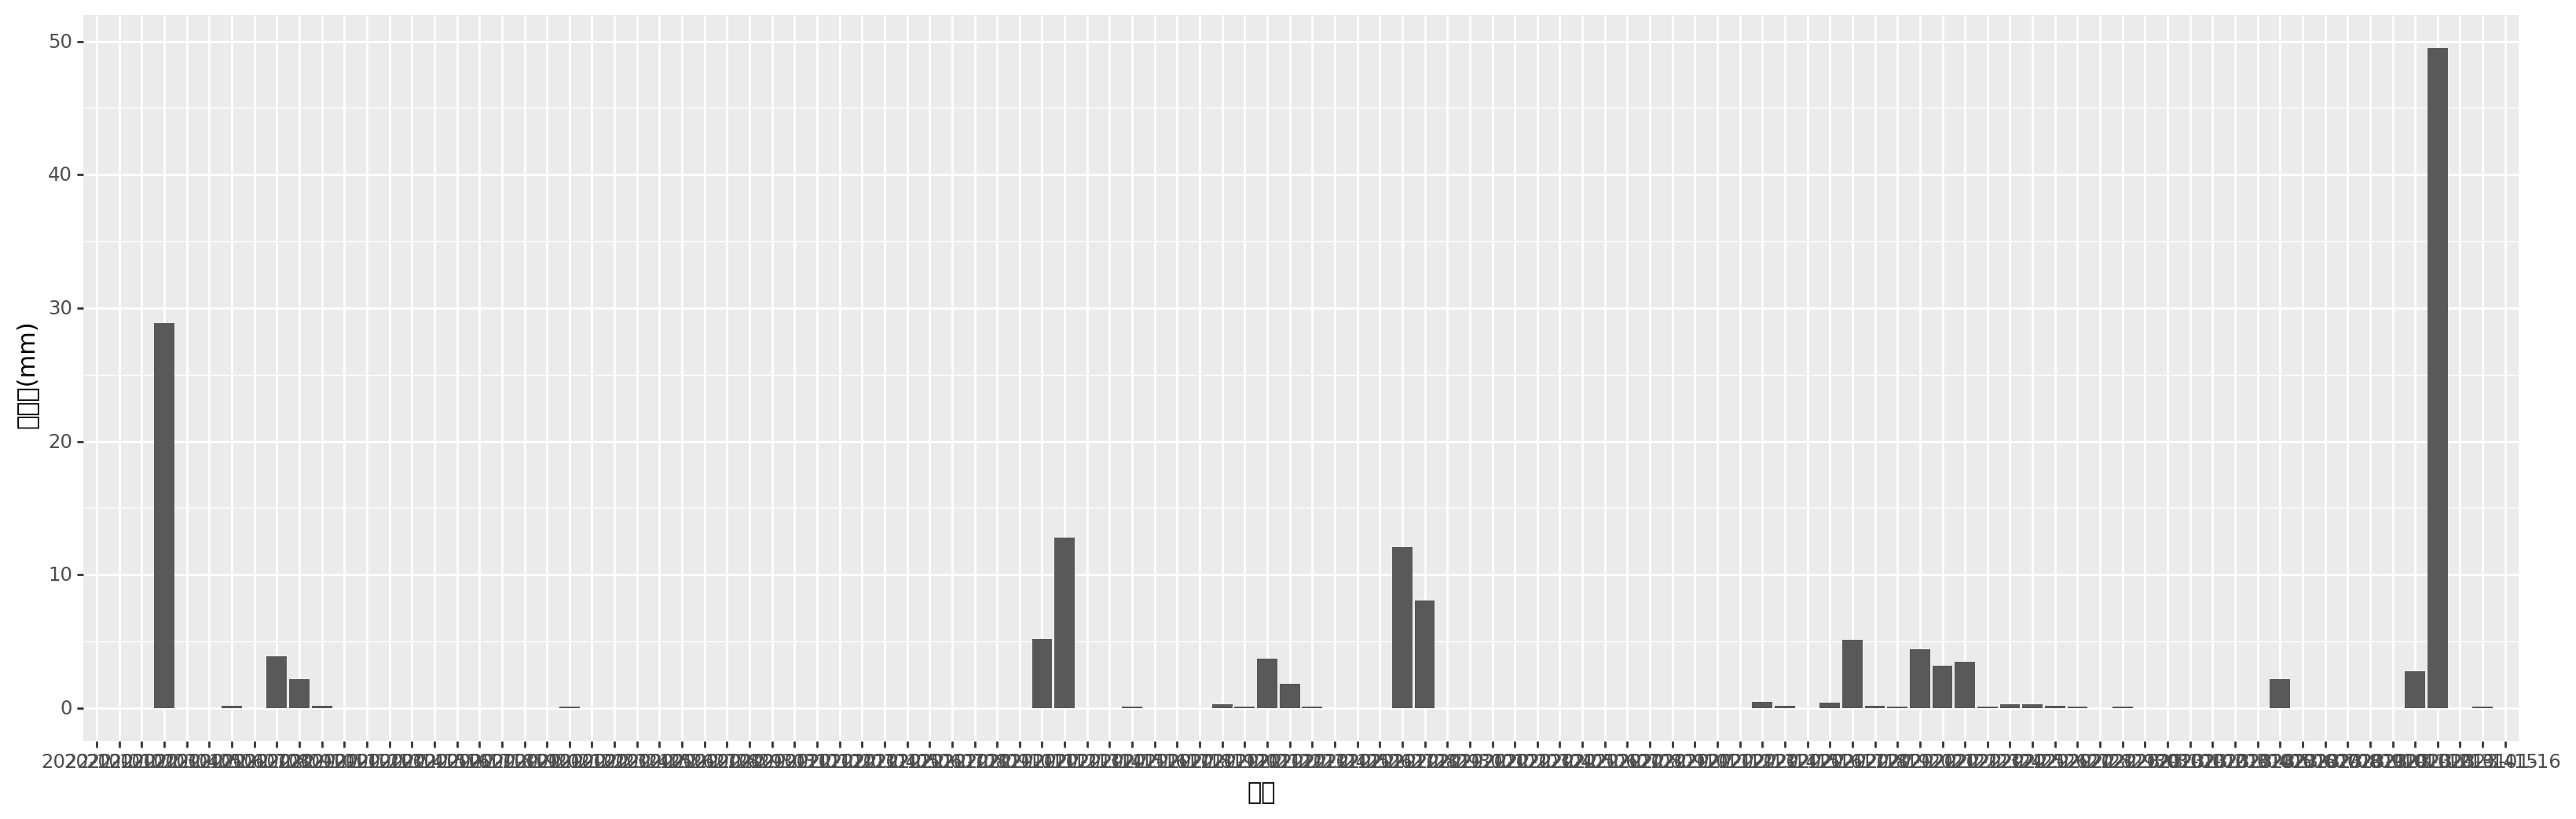

<ggplot: (8737635296320)>

In [17]:

( ggplot(df, aes(x='일시', y='강우량(mm)'))
    +geom_bar(stat='identity', position='dodge') 
    +theme(text=element_text(family='NanumGothicCoding'), figure_size=(20,6))
    )


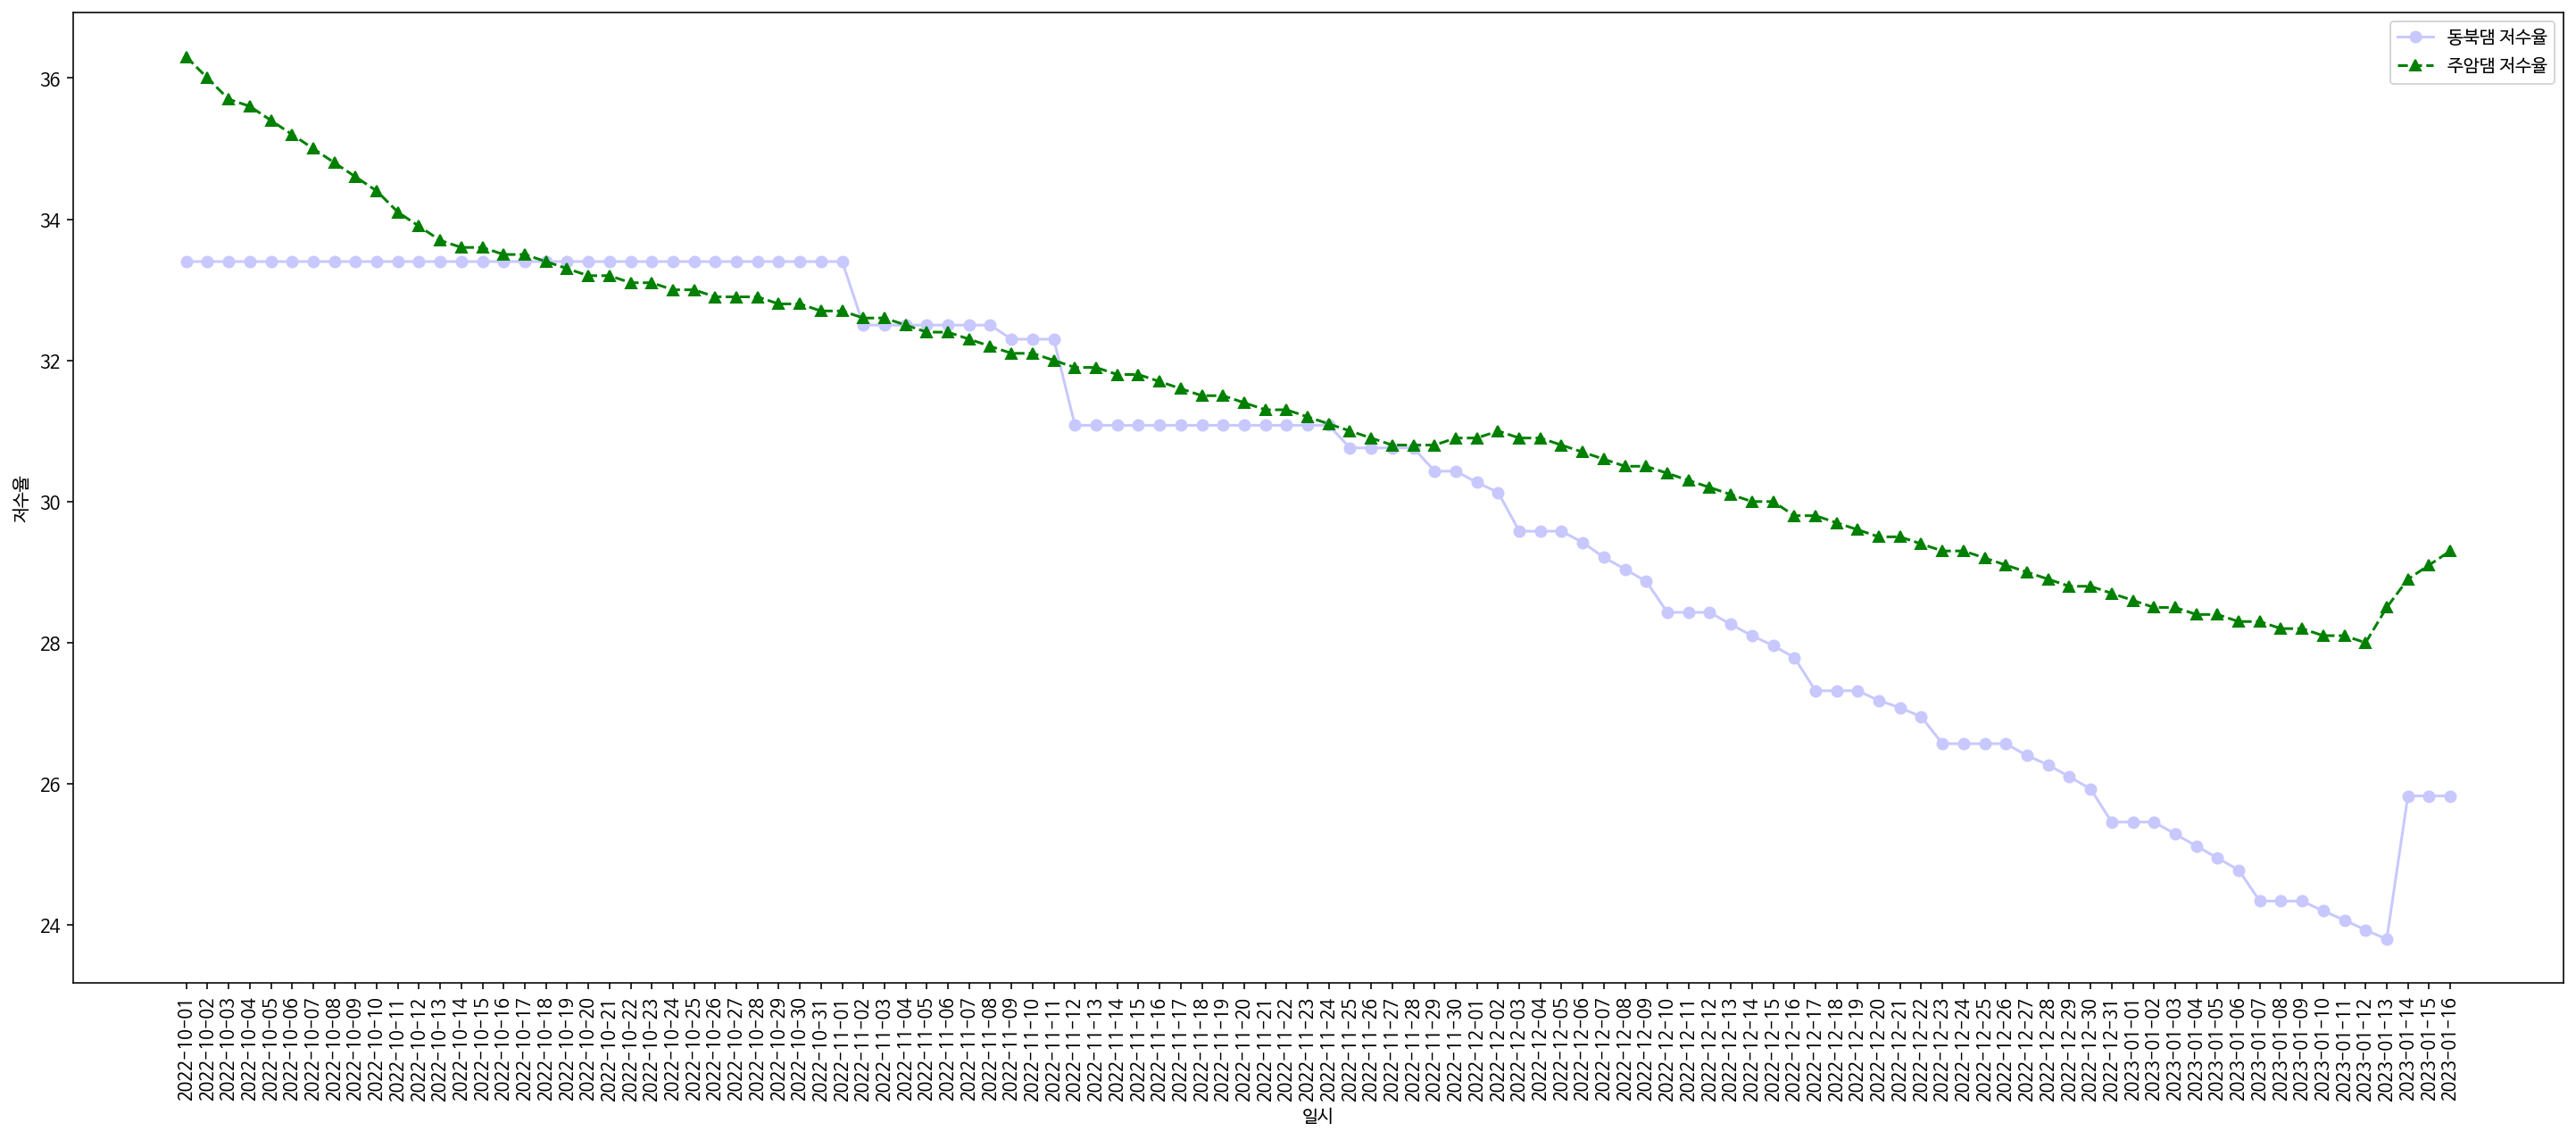

In [21]:
plt.figure(figsize=(25, 10))

plt.plot(df['일시'], df['동북댐저수율(%)'], 'o-', color='#C8C8FF', label='동북댐 저수율')
plt.plot(df['일시'], df['주암댐저수율(%)'], '^--g', label='주암댐 저수율')
plt.legend()
plt.xlabel('일시')
plt.ylabel('저수율')

plt.xticks(rotation=90)

plt.show()

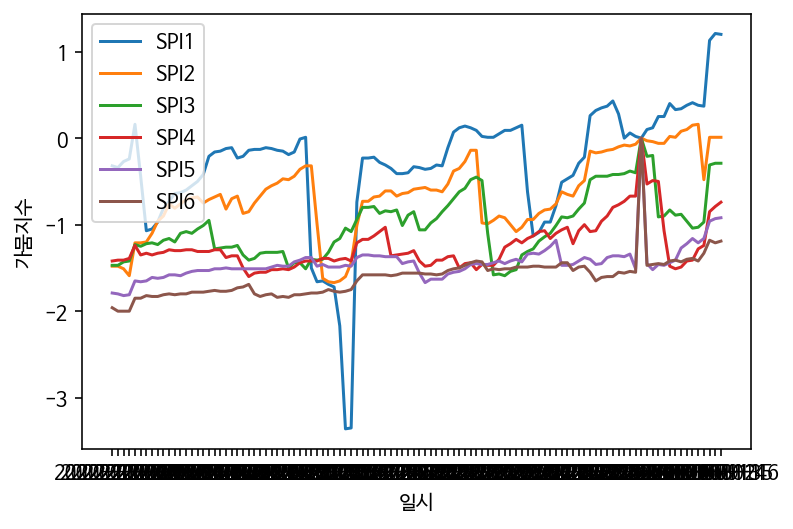

In [19]:
plt.plot(df['일시'], df['SPI1'], '-',  label='SPI1')
plt.plot(df['일시'], df['SPI2'], '-',  label='SPI2')
plt.plot(df['일시'], df['SPI3'], '-',  label='SPI3')
plt.plot(df['일시'], df['SPI4'], '-',  label='SPI4')
plt.plot(df['일시'], df['SPI5'], '-',  label='SPI5')
plt.plot(df['일시'], df['SPI6'], '-',  label='SPI6')


plt.legend()
plt.xlabel('일시')
plt.ylabel('가뭄지수')


plt.show()

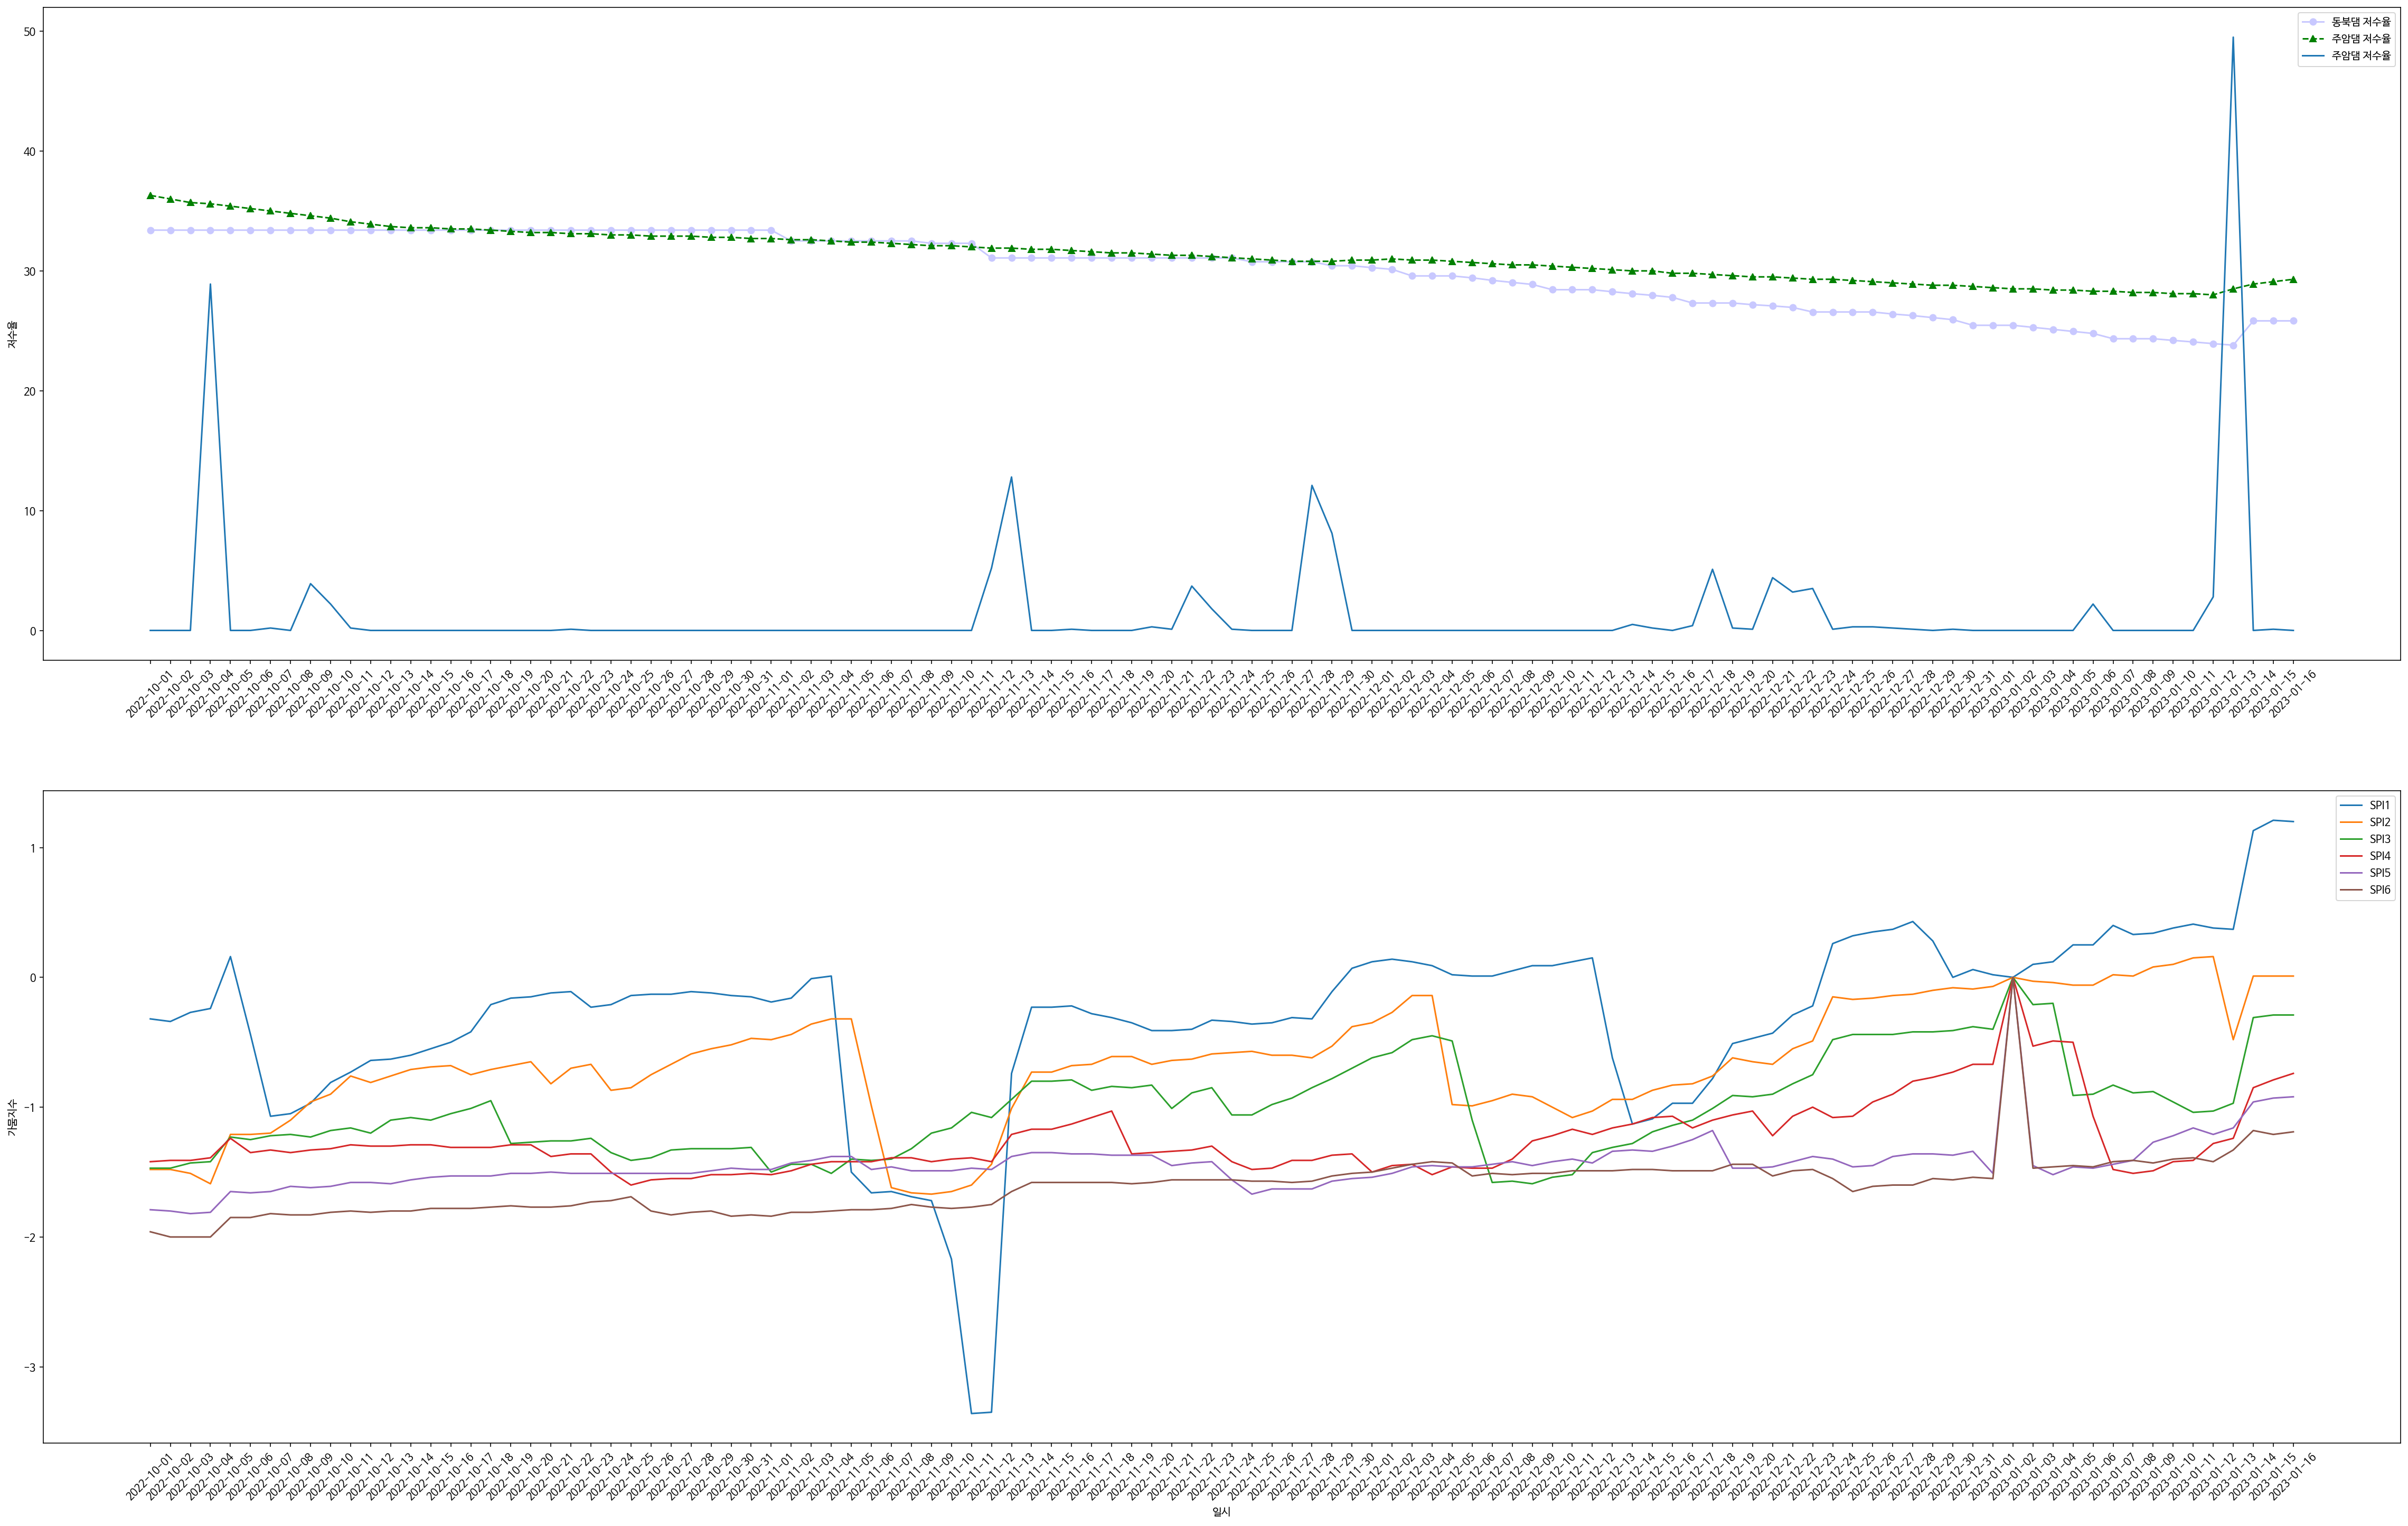

In [20]:
plt.figure(figsize=(40, 25))
ax1 = plt.subplot(2, 1, 1)        
plt.plot(df['일시'], df['동북댐저수율(%)'], 'o-', color='#C8C8FF', label='동북댐 저수율')
plt.plot(df['일시'], df['주암댐저수율(%)'], '^--g', label='주암댐 저수율')
plt.plot(df['일시'], df['강우량(mm)'], '-', label='주암댐 저수율') 
plt.legend()
#plt.xlabel('일시')
plt.ylabel('저수율')
plt.xticks(rotation=45)

ax2 = plt.subplot(2, 1, 2, sharex=ax1)        
plt.plot(df['일시'], df['SPI1'], '-',  label='SPI1')
plt.plot(df['일시'], df['SPI2'], '-',  label='SPI2')
plt.plot(df['일시'], df['SPI3'], '-',  label='SPI3')
plt.plot(df['일시'], df['SPI4'], '-',  label='SPI4')
plt.plot(df['일시'], df['SPI5'], '-',  label='SPI5')
plt.plot(df['일시'], df['SPI6'], '-',  label='SPI6')
plt.legend()
plt.xlabel('일시')
plt.ylabel('가뭄지수')
plt.xticks(rotation=45)


plt.show()

